In [2]:
#!pip install tensorflow matplotlib pillow


# Convolutional Neural Network

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# === 1. Load dataset ===
train_ds = tf.keras.utils.image_dataset_from_directory(
    "data/train",
    image_size=(64, 64),  # smaller size = less memory
    batch_size=16
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "data/val",
    image_size=(64, 64),
    batch_size=16
)

# === 2. Normalize ===
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

# === 3. Small CNN ===
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# === 4. Compile ===
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# === 5. Train ===
history = model.fit(train_ds, validation_data=val_ds, epochs=25)

# === 6. Save model ===
model.save("cat_dog_small_cnn.h5")

# === 7. Evaluate ===
loss, acc = model.evaluate(val_ds)
print(f"Validation accuracy: {acc:.2f}")


Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Epoch 1/25
50/50 [==============================] - 4s 62ms/step - loss: 0.6955 - accuracy: 0.5013 - val_loss: 0.6989 - val_accuracy: 0.5000
Epoch 2/25
50/50 [==============================] - 3s 59ms/step - loss: 0.6886 - accuracy: 0.5275 - val_loss: 0.6987 - val_accuracy: 0.4950
Epoch 3/25
50/50 [==============================] - 3s 64ms/step - loss: 0.6864 - accuracy: 0.5288 - val_loss: 0.6916 - val_accuracy: 0.5350
Epoch 4/25
50/50 [==============================] - 3s 64ms/step - loss: 0.6532 - accuracy: 0.6187 - val_loss: 0.6687 - val_accuracy: 0.6200
Epoch 5/25
50/50 [==============================] - 3s 61ms/step - loss: 0.6220 - accuracy: 0.6612 - val_loss: 0.7169 - val_accuracy: 0.5600
Epoch 6/25
50/50 [==============================] - 3s 58ms/step - loss: 0.5586 - accuracy: 0.7250 - val_loss: 0.6862 - val_accuracy: 0.6300
Epoch 7/25
50/50 [==============================] - 3s 62ms/step - loss: 0

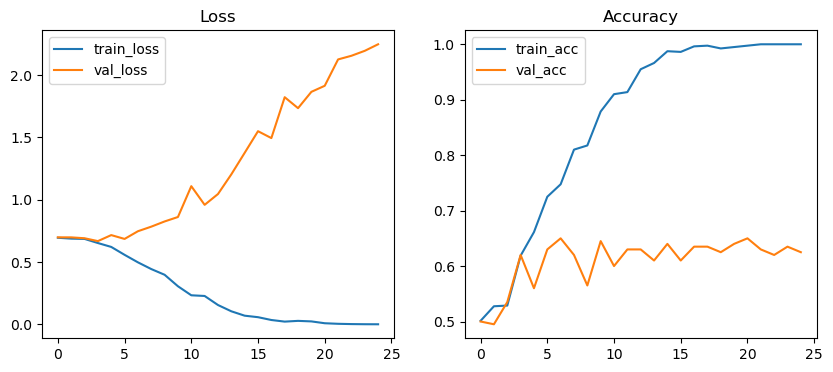

In [4]:
import matplotlib.pyplot as plt

# ===== Plot training results =====
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy')
plt.show()